In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-feature-selection/__results__.html
/kaggle/input/house-price-feature-selection/selected_features.csv
/kaggle/input/house-price-feature-selection/__notebook__.ipynb
/kaggle/input/house-price-feature-selection/__output__.json
/kaggle/input/house-price-feature-selection/custom.css
/kaggle/input/house-price-featureengineering/__results__.html
/kaggle/input/house-price-featureengineering/minmax_scaler.joblib
/kaggle/input/house-price-featureengineering/xtrain.csv
/kaggle/input/house-price-featureengineering/xtest.csv
/kaggle/input/house-price-featureengineering/__notebook__.ipynb
/kaggle/input/house-price-featureengineering/__output__.json
/kaggle/input/house-price-featureengineering/ytrain.csv
/kaggle/input/house-price-featureengineering/ytest.csv
/kaggle/input/house-price-featureengineering/custom.css
/kaggle/input/house-price-featureengineering/__results___files/__results___43_25.png
/kaggle/input/house-price-featureengineering/__results___files/__results___43_9

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import joblib

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)

In [3]:
X_train = pd.read_csv('/kaggle/input/house-price-featureengineering/xtrain.csv')
X_test = pd.read_csv('/kaggle/input/house-price-featureengineering/xtest.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.0,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.0,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [4]:
y_train = pd.read_csv('/kaggle/input/house-price-featureengineering/ytrain.csv')
y_test = pd.read_csv('/kaggle/input/house-price-featureengineering/ytest.csv')
y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


In [5]:
features = pd.read_csv('/kaggle/input/house-price-feature-selection/selected_features.csv')
features = features['0'].to_list()

features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [6]:
X_train = X_train[features]
X_test = X_test[features]

In [7]:
lin_model = Lasso(alpha=0.001, random_state=0)
lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [8]:
pred = lin_model.predict(X_train)

print('Train mse : {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('Train rmse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('Train r2  : {}'.format(r2_score(np.exp(y_train), np.exp(pred))))

print()

Train mse : 781396538
Train rmse: 27953
Train r2  : 0.8748530463468015



In [9]:
pred = lin_model.predict(X_test)

print('Train mse : {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('Train rmse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('Train r2  : {}'.format(r2_score(np.exp(y_test), np.exp(pred))))

print()

Train mse : 1060767982
Train rmse: 32569
Train r2  : 0.8456417073258413



In [10]:
print('Average house price: ', int(np.exp(y_train).median()))

Average house price:  163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

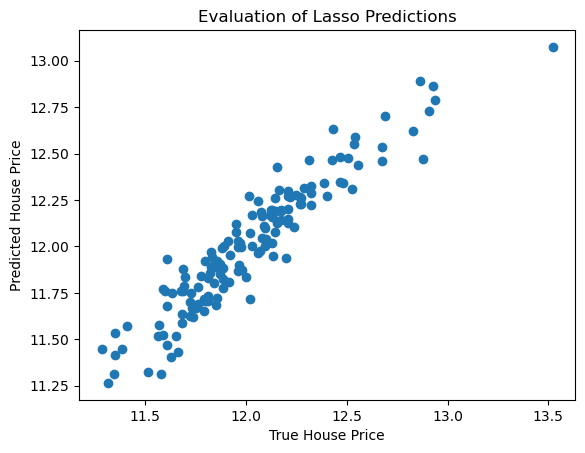

In [11]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [12]:
y_test.reset_index(drop=True)

,SalePrice
0,12.209188
1,11.798104
2,11.608236
3,12.165251
4,11.385092
...,...
141,11.884489
142,12.287653
143,11.921718
144,11.598727


In [13]:
y_test.reset_index(drop=True, inplace=True)
preds = pd.Series(lin_model.predict(X_test))

preds

0      12.148226
1      11.919326
2      11.677107
3      12.304289
4      11.447473
         ...    
141    11.775100
142    12.316546
143    11.955957
144    11.757571
145    12.072691
Length: 146, dtype: float64

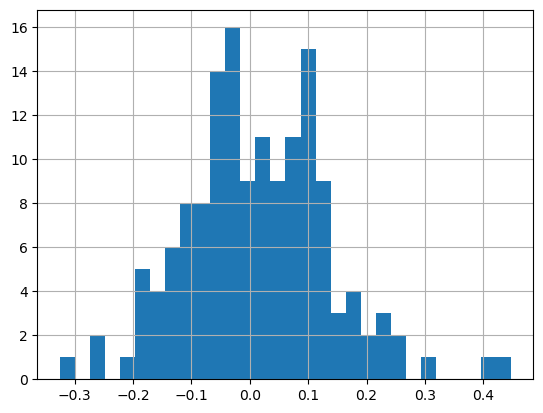

In [14]:
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

# **Feature importance**

Text(0.5, 1.0, 'Feature Importance')

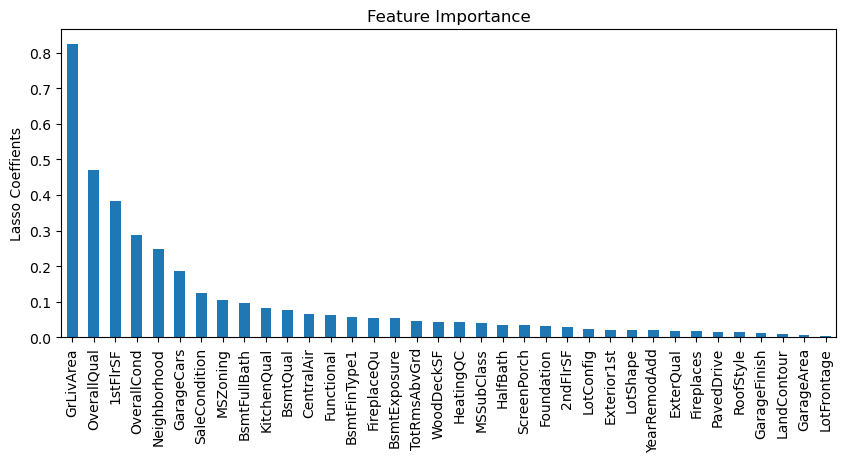

In [15]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(10,4))
plt.ylabel('Lasso Coeffients')
plt.title('Feature Importance')

In [16]:
joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']